# Individueel Labo 2 - opgave
ML modellen (2u45)

Deze opgave bestaat uit volgende onderdelen: 
- deel 1 : data preparatie (4ptn)
- deel 2 : feature selection (4ptn)
- deel 3 : opstellen leermodellen (10ptn)
- deel 4 : evaluatie leermodellen (2ptn)

Je voert deze onderdelen in principe in volgorde uit. Zit je toch vast bij een bepaald deel, dan kan je meestal wel nog iets zinvols demonstreren in een volgend deel. 

Op sommige plaatsen staat een 🟢. Hier zal je uitleg moeten geven. Je zal dus in markdown tekst moeten typen om het gevraagde toe te lichten. 

In [22]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## deel 1 : data preparatie (4ptn)

### 1.1 Inlezen data
De data waar we mee gaan werken zit in twee bestanden. Er is een bestand met data over de energiemetingen per dag. En er is een bestand met informatie over het weer per dag. 

#### Energie data
* energiedata vind je in EnergieData.csv. In dit bestand zitten meetwaarden van een digitale meter en geproduceerde zonne-energie, per dag
    * Afname Dag: De afname van die dag van het net tijdens de piekuren
    * Afname Nacht: De afname van die dag van het net tijdens de daluren
    * Injectie Dag: De injectie van die dag naar het net tijdens de piekuren
    * Injectie Nacht: De injectie van die dag naar het net tijdens de daluren
    * zon: de opgewekte zonne-energie van die dag
    
De eerste lijnen zien er zo uit: 

>`datum;Afname Dag;Afname Nacht;Injectie Dag;Injectie Nacht;zon
26/10/2021;0;0;0;0;10,6
27/10/2021;36,195;8,22;0,348;0;10,1
28/10/2021;15,404;14,346;10,975;0;19,9`
    
* Lees het bestand in als een pandas dataframe. 
* Zet alle kolommen om naar een geschikt datatype. <br>_Tip: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html_
* Geef een overzicht van de kolommen en hun datatypes.

In [23]:
Data = pd.read_csv('EnergieData.csv',names=['datum','Afname Dag','Afname Nacht','Injectie Dag','Injectie Nacht','zon'],delimiter=';', skiprows=1)
Data.datum = pd.to_datetime(Data['datum'])
Data = Data.replace(',','.',regex= True)
#print(Data.dtypes)
Data['zon'] = Data['zon'].astype(float)
Data['Afname Dag'] = Data['zon'].astype(float)
Data['Afname Nacht'] = Data['zon'].astype(float)
Data['Injectie Dag'] = Data['zon'].astype(float)
Data['Injectie Nacht'] = Data['zon'].astype(float)


print(Data.info())
Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datum           205 non-null    datetime64[ns]
 1   Afname Dag      205 non-null    float64       
 2   Afname Nacht    205 non-null    float64       
 3   Injectie Dag    205 non-null    float64       
 4   Injectie Nacht  205 non-null    float64       
 5   zon             205 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.7 KB
None


C:\Users\Guest\AppData\Local\Temp/ipykernel_13320/1639570382.py:2: UserWarning: Parsing '26/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data.datum = pd.to_datetime(Data['datum'])
C:\Users\Guest\AppData\Local\Temp/ipykernel_13320/1639570382.py:2: UserWarning: Parsing '27/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data.datum = pd.to_datetime(Data['datum'])
C:\Users\Guest\AppData\Local\Temp/ipykernel_13320/1639570382.py:2: UserWarning: Parsing '28/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data.datum = pd.to_datetime(Data['datum'])
C:\Users\Guest\AppData\Local\Temp/ipykernel_13320/1639570382.py:2: UserWarning: Parsing '29/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Data.datum = pd.to_datetime(Data['datum'])
C:\Users\Guest\AppDa

,datum,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht,zon
0,2021-10-26,10.6,10.6,10.6,10.6,10.6
1,2021-10-27,10.1,10.1,10.1,10.1,10.1
2,2021-10-28,19.9,19.9,19.9,19.9,19.9
3,2021-10-29,10.8,10.8,10.8,10.8,10.8
4,2021-10-30,1.2,1.2,1.2,1.2,1.2
...,...,...,...,...,...,...
200,2022-05-14,27.2,27.2,27.2,27.2,27.2
201,2022-05-15,25.8,25.8,25.8,25.8,25.8
202,2022-05-16,14.9,14.9,14.9,14.9,14.9
203,2022-05-17,24.2,24.2,24.2,24.2,24.2


#### Weer data
Weerdata vind je in weer_meteostat.csv. In dit bestand zit gemeten data ivm het weer, per dag.

| **Kolom** | **Beschrijving**                                                                     |
|:-----------|:------------------------------------------------------------------------------------|
| time       | The date                                                                            |
| tavg       | The average air temperature in _°C_                                                 |
| tmin       | The minimum air temperature in _°C_                                                 |
| tmax       | The maximum air temperature in _°C_                                                 |
| prcp       | The daily precipitation total in _mm_                                               |
| snow       | The snow depth in _mm_                                                              |
| wdir       | The average wind direction in degrees (_°_)                                         |
| wspd       | The average wind speed in _km/h_                                                    |
| wpgt       | The peak wind gust in _km/h_                                                        |
| pres       | The average sea-level air pressure in _hPa_                                         |
| tsun       | The daily sunshine total in minutes (_m_)                                           |

De eerste lijnen zien er zo uit: 

>`time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
2021-10-26,12.5,10.8,14.6,0.6,,215.0,13.9,27.8,1020.0,
2021-10-27,14.0,12.7,16.3,0.0,,205.0,13.9,31.5,1022.1,
2021-10-28,13.0,10.5,16.2,0.0,,171.0,11.6,33.3,1015.2,`

* Lees het bestand in als een pandas dataframe. 
* Zet alle kolommen om naar een geschikt datatype. 
* Geef een overzicht van 5 willekeurige (random) dagen uit de dataset. 

In [24]:
DataWeer = pd.read_csv('weer_meteostat.csv')
print(DataWeer.head())
DataWeer.time = pd.to_datetime(DataWeer['time'])
DataWeer.tavg = DataWeer.tavg.astype('float')
DataWeer.tmin = DataWeer.tmin.astype('float')
DataWeer.tmax = DataWeer.tmax.astype('float')
DataWeer.prcp = DataWeer.prcp.astype('float')
DataWeer.wdir = DataWeer.wdir.astype('float')
DataWeer.wspd = DataWeer.wspd.astype('float')
DataWeer.wpgt = DataWeer.wpgt.astype('float')
DataWeer.pres = DataWeer.pres.astype('float')
#DataWeer = DataWeer.dropna(how='all', axis=1, inplace=True)
print(DataWeer.info())


         time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0  2021-10-26  12.5  10.8  14.6   0.6   NaN  215.0  13.9  27.8  1020.0   NaN
1  2021-10-27  14.0  12.7  16.3   0.0   NaN  205.0  13.9  31.5  1022.1   NaN
2  2021-10-28  13.0  10.5  16.2   0.0   NaN  171.0  11.6  33.3  1015.2   NaN
3  2021-10-29  13.9  11.9  16.9   2.6   NaN  174.0  15.1  44.5  1005.6   NaN
4  2021-10-30  13.1  12.3  14.2   8.6   NaN  170.0  12.4  33.3  1001.3   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    205 non-null    datetime64[ns]
 1   tavg    204 non-null    float64       
 2   tmin    204 non-null    float64       
 3   tmax    204 non-null    float64       
 4   prcp    204 non-null    float64       
 5   snow    0 non-null      float64       
 6   wdir    204 non-null    float64       
 7   wspd    204 non-null    float64 

Ga op zoek naar kolommen zonder waarden en verwijder deze. 

In [25]:
DataWeer = DataWeer.drop(['snow','tsun'], axis= 1)
DataWeer


,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2021-10-26,12.5,10.8,14.6,0.6,215.0,13.9,27.8,1020.0
1,2021-10-27,14.0,12.7,16.3,0.0,205.0,13.9,31.5,1022.1
2,2021-10-28,13.0,10.5,16.2,0.0,171.0,11.6,33.3,1015.2
3,2021-10-29,13.9,11.9,16.9,2.6,174.0,15.1,44.5,1005.6
4,2021-10-30,13.1,12.3,14.2,8.6,170.0,12.4,33.3,1001.3
...,...,...,...,...,...,...,...,...,...
200,2022-05-14,15.8,10.6,21.8,0.0,265.0,9.6,22.2,1021.8
201,2022-05-15,20.3,12.4,28.8,0.0,81.0,9.2,31.5,1017.5
202,2022-05-16,20.7,18.4,22.9,0.0,221.0,13.7,35.2,1015.8
203,2022-05-17,21.2,16.5,26.5,0.0,229.0,7.5,25.9,1019.8


### 1.2 Samenstellen data en afleiden extra features
- Voeg de twee databronnen samen tot één grote dataframe.

In [26]:
merge = pd.merge(Data, DataWeer, left_on= 'datum', right_on= 'time')
merge = merge.drop(columns='datum')
merge

,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht,zon,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,10.6,10.6,10.6,10.6,10.6,2021-10-26,12.5,10.8,14.6,0.6,215.0,13.9,27.8,1020.0
1,10.1,10.1,10.1,10.1,10.1,2021-10-27,14.0,12.7,16.3,0.0,205.0,13.9,31.5,1022.1
2,19.9,19.9,19.9,19.9,19.9,2021-10-28,13.0,10.5,16.2,0.0,171.0,11.6,33.3,1015.2
3,10.8,10.8,10.8,10.8,10.8,2021-10-29,13.9,11.9,16.9,2.6,174.0,15.1,44.5,1005.6
4,1.2,1.2,1.2,1.2,1.2,2021-10-30,13.1,12.3,14.2,8.6,170.0,12.4,33.3,1001.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,27.2,27.2,27.2,27.2,27.2,2022-05-14,15.8,10.6,21.8,0.0,265.0,9.6,22.2,1021.8
146,25.8,25.8,25.8,25.8,25.8,2022-05-15,20.3,12.4,28.8,0.0,81.0,9.2,31.5,1017.5
147,14.9,14.9,14.9,14.9,14.9,2022-05-16,20.7,18.4,22.9,0.0,221.0,13.7,35.2,1015.8
148,24.2,24.2,24.2,24.2,24.2,2022-05-17,21.2,16.5,26.5,0.0,229.0,7.5,25.9,1019.8


* Verwijder dagen waarvan geen weerinfo bekend is

In [27]:
mask = merge['tavg'].isnull()
mask
merge[mask].drop(columns=['time','tavg','tmin','tmax','prcp','wdir','wspd','wpgt','pres','Afname Dag','Afname Nacht','Injectie Dag','Injectie Nacht','zon'])
merge

,Afname Dag,Afname Nacht,Injectie Dag,Injectie Nacht,zon,time,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,10.6,10.6,10.6,10.6,10.6,2021-10-26,12.5,10.8,14.6,0.6,215.0,13.9,27.8,1020.0
1,10.1,10.1,10.1,10.1,10.1,2021-10-27,14.0,12.7,16.3,0.0,205.0,13.9,31.5,1022.1
2,19.9,19.9,19.9,19.9,19.9,2021-10-28,13.0,10.5,16.2,0.0,171.0,11.6,33.3,1015.2
3,10.8,10.8,10.8,10.8,10.8,2021-10-29,13.9,11.9,16.9,2.6,174.0,15.1,44.5,1005.6
4,1.2,1.2,1.2,1.2,1.2,2021-10-30,13.1,12.3,14.2,8.6,170.0,12.4,33.3,1001.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,27.2,27.2,27.2,27.2,27.2,2022-05-14,15.8,10.6,21.8,0.0,265.0,9.6,22.2,1021.8
146,25.8,25.8,25.8,25.8,25.8,2022-05-15,20.3,12.4,28.8,0.0,81.0,9.2,31.5,1017.5
147,14.9,14.9,14.9,14.9,14.9,2022-05-16,20.7,18.4,22.9,0.0,221.0,13.7,35.2,1015.8
148,24.2,24.2,24.2,24.2,24.2,2022-05-17,21.2,16.5,26.5,0.0,229.0,7.5,25.9,1019.8


- Bereken op basis van de datum minstens 2 nuttige getallen die je als feature zou kunnen gebruiken. 

In [28]:
#bron: https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components


- Teken een grafiek van de minimum temperatuur en maximum temperatuur over de tijd. 

14.6    10.8
16.3    12.7
16.2    10.5
16.9    11.9
14.2    12.3
        ... 
21.8    10.6
28.8    12.4
22.9    18.4
26.5    16.5
24.9    17.7
Name: tmin, Length: 150, dtype: float64


<AxesSubplot:>

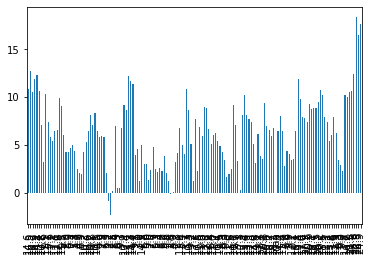

In [29]:
from pandas import Series
arr = merge['tmin']


brr = merge['tmax']

arr.index = brr.values
print(arr)

arr.plot.bar()

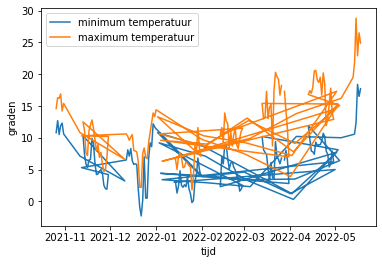

In [30]:
ax1 = plt.subplot()
ax1.plot(merge['time'],merge['tmin'], label = 'minimum temperatuur')
ax1.plot(merge['time'],merge['tmax'], label='maximum temperatuur')
ax1.set_xlabel('tijd')
ax1.set_ylabel('graden')
ax1.legend()

## deel 2 : feature selection (4ptn)

Verwijder eerst kolommen die feature noch target zijn. De energiedata die we niet gaan voorspellen mogen we niet als feature gebruiken en dienen we dus zeker eerst te verwijderen.
>'datum','Afname Dag','Afname Nacht', 'Injectie Dag', 'Injectie Nacht'

In [31]:
#del merge['datum']
del merge['Afname Dag']
del merge['Afname Nacht']
del merge['Injectie Dag']
del merge['Injectie Nacht']


#df.replace(' ' , '_')
print(merge)

      zon       time  tavg  tmin  tmax  prcp   wdir  wspd  wpgt    pres
0    10.6 2021-10-26  12.5  10.8  14.6   0.6  215.0  13.9  27.8  1020.0
1    10.1 2021-10-27  14.0  12.7  16.3   0.0  205.0  13.9  31.5  1022.1
2    19.9 2021-10-28  13.0  10.5  16.2   0.0  171.0  11.6  33.3  1015.2
3    10.8 2021-10-29  13.9  11.9  16.9   2.6  174.0  15.1  44.5  1005.6
4     1.2 2021-10-30  13.1  12.3  14.2   8.6  170.0  12.4  33.3  1001.3
..    ...        ...   ...   ...   ...   ...    ...   ...   ...     ...
145  27.2 2022-05-14  15.8  10.6  21.8   0.0  265.0   9.6  22.2  1021.8
146  25.8 2022-05-15  20.3  12.4  28.8   0.0   81.0   9.2  31.5  1017.5
147  14.9 2022-05-16  20.7  18.4  22.9   0.0  221.0  13.7  35.2  1015.8
148  24.2 2022-05-17  21.2  16.5  26.5   0.0  229.0   7.5  25.9  1019.8
149  25.5 2022-05-18  21.0  17.7  24.9   0.0  294.0   8.1  22.2  1020.6

[150 rows x 10 columns]


In [32]:
corr_matix = merge.corr().abs()
corr_matix


,zon,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
zon,1.000000,0.461719,0.212367,0.637293,0.352064,0.291089,0.187413,0.058911,0.134991
tavg,0.461719,1.000000,0.925584,0.954522,0.069788,0.083059,0.040794,0.121953,0.142187
tmin,0.212367,0.925584,1.000000,0.781475,0.033985,0.047282,0.131013,0.160534,0.207420
tmax,0.637293,0.954522,0.781475,1.000000,0.174025,0.188325,0.066233,0.045984,0.050335
prcp,0.352064,0.069788,0.033985,0.174025,1.000000,0.144740,0.504834,0.509720,0.633992
wdir,0.291089,0.083059,0.047282,0.188325,0.144740,1.000000,0.316659,0.226628,0.117626
wspd,0.187413,0.040794,0.131013,0.066233,0.504834,0.316659,1.000000,0.952129,0.519095
wpgt,0.058911,0.121953,0.160534,0.045984,0.509720,0.226628,0.952129,1.000000,0.565245
pres,0.134991,0.142187,0.207420,0.050335,0.633992,0.117626,0.519095,0.565245,1.000000


In [33]:
upper = corr_matix.where(np.triu(np.ones(corr_matix.shape), k = 1).astype(bool)) 
print(); print(upper)


      zon      tavg      tmin      tmax      prcp      wdir      wspd  \
zon   NaN  0.461719  0.212367  0.637293  0.352064  0.291089  0.187413   
tavg  NaN       NaN  0.925584  0.954522  0.069788  0.083059  0.040794   
tmin  NaN       NaN       NaN  0.781475  0.033985  0.047282  0.131013   
tmax  NaN       NaN       NaN       NaN  0.174025  0.188325  0.066233   
prcp  NaN       NaN       NaN       NaN       NaN  0.144740  0.504834   
wdir  NaN       NaN       NaN       NaN       NaN       NaN  0.316659   
wspd  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
wpgt  NaN       NaN       NaN       NaN       NaN       NaN       NaN   
pres  NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          wpgt      pres  
zon   0.058911  0.134991  
tavg  0.121953  0.142187  
tmin  0.160534  0.207420  
tmax  0.045984  0.050335  
prcp  0.509720  0.633992  
wdir  0.226628  0.117626  
wspd  0.952129  0.519095  
wpgt       NaN  0.565245  
pres       NaN       NaN 

In [34]:
to_drop = [column for column in upper.columns if any (upper[column] > 0.3)]
print(); print(to_drop)


['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'wpgt', 'pres']


### 2.1 Voorspellen van het nut van features
- Stel een correlatie matrix op voor de features en target<br>
Met volgende toevoeging kan je deze een kleur geven en kan je sneller de antwoorden vinden op volgende vragen: 
>`<correlatiematrix hier>.style.background_gradient(cmap='coolwarm')`

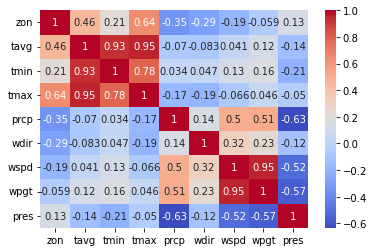

In [35]:
#pd.plotting.scatter_matrix(merge, figsize=(10, 10), cmap = 'coolwarm')
import seaborn as sn
corrMatrix = merge.corr()
sn.heatmap(corrMatrix, annot=True, cmap = 'coolwarm')
plt.show()

In [36]:
merge.corr()

,zon,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
zon,1.000000,0.461719,0.212367,0.637293,-0.352064,-0.291089,-0.187413,-0.058911,0.134991
tavg,0.461719,1.000000,0.925584,0.954522,-0.069788,-0.083059,0.040794,0.121953,-0.142187
tmin,0.212367,0.925584,1.000000,0.781475,0.033985,0.047282,0.131013,0.160534,-0.207420
tmax,0.637293,0.954522,0.781475,1.000000,-0.174025,-0.188325,-0.066233,0.045984,-0.050335
prcp,-0.352064,-0.069788,0.033985,-0.174025,1.000000,0.144740,0.504834,0.509720,-0.633992
wdir,-0.291089,-0.083059,0.047282,-0.188325,0.144740,1.000000,0.316659,0.226628,-0.117626
wspd,-0.187413,0.040794,0.131013,-0.066233,0.504834,0.316659,1.000000,0.952129,-0.519095
wpgt,-0.058911,0.121953,0.160534,0.045984,0.509720,0.226628,0.952129,1.000000,-0.565245
pres,0.134991,-0.142187,-0.207420,-0.050335,-0.633992,-0.117626,-0.519095,-0.565245,1.000000


- Verwijder twee features die op basis van deze correlatiematrix het minst geschikt zijn om de geproduceerde zonne-energie te voorspellen.

In [37]:
#tavg
#tmax
del merge['pres']
del merge['wpgt']


- Verwijder twee features die op basis van deze correlatiematrix sterk gerelateerd zijn aan een andere feature waardoor het weinig nuttig is om beide features te behouden. 

In [38]:
#del merge ['tmax']
del merge ['tavg']

merge.dropna(inplace=True)

In [39]:
#print(merge)
#temp = merge['zon']
#temp = temp.replace(',', '.')
#print(temp)
#merge.dropna()
#merge = merge.reset_index()

### 2.2 Features en target

Maak het onderscheid tussen features en target. 
En maak de verdeling tussen trainings- en testdata. Gebruik een testset van 30%. 

In [40]:
target = merge['zon']
features = merge.iloc[:,2:]

print(features)

     tmin  tmax  prcp   wdir  wspd
0    10.8  14.6   0.6  215.0  13.9
1    12.7  16.3   0.0  205.0  13.9
2    10.5  16.2   0.0  171.0  11.6
3    11.9  16.9   2.6  174.0  15.1
4    12.3  14.2   8.6  170.0  12.4
..    ...   ...   ...    ...   ...
145  10.6  21.8   0.0  265.0   9.6
146  12.4  28.8   0.0   81.0   9.2
147  18.4  22.9   0.0  221.0  13.7
148  16.5  26.5   0.0  229.0   7.5
149  17.7  24.9   0.0  294.0   8.1

[149 rows x 5 columns]


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size= 0.3)

## deel 3 : opstellen leermodellen (10ptn)

In [42]:
#imports
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


### 3.1 Normalisatie van data

Toon een boxplot van de features van je trainingsset, vóór de normalisatie. 

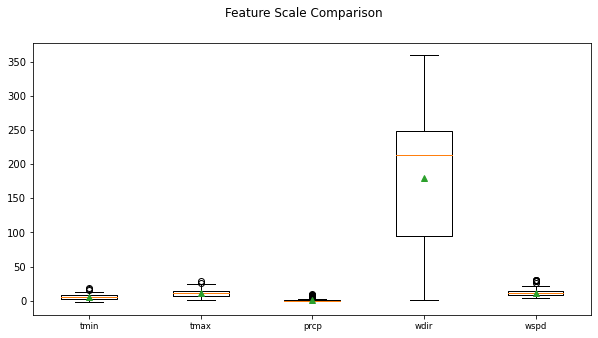

In [43]:
names = features.columns


def featureBoxPlot(X, names, title):
    plt.rcParams["figure.figsize"] = [10,5]
    fig = plt.figure()
    fig.suptitle(title)
    ax = fig.add_subplot()
    plt.boxplot(X, showmeans=True)
    ax.set_xticklabels(names, fontsize = 8.5)
    plt.show()
    return

featureBoxPlot(features.values, names,"Feature Scale Comparison")

Normaliseer je features met een _RobustScaler_ en geef deze opnieuw weer in een boxplot. 

Normaliseer ook je features van je trainingsset. 

In [44]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print("Tree test set accuracy: {:.2f}".format(tree.score(X_test, y_test)))

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("Knn test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Tree test set accuracy: 0.29
Knn test set accuracy: 0.07


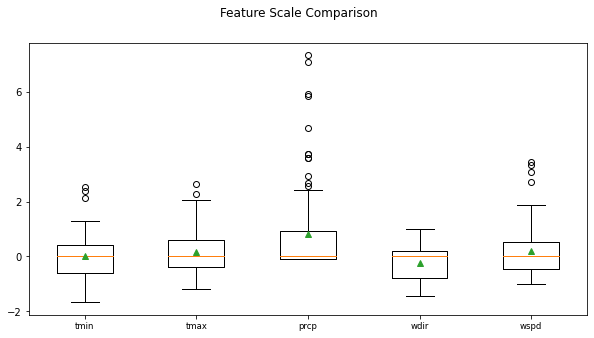

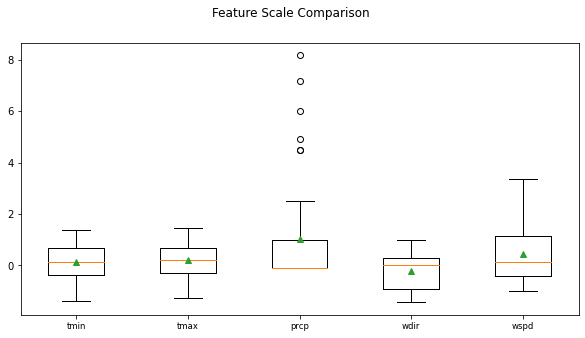

In [45]:
#Robustscaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

featureBoxPlot(X_train_scaled, names,"Feature Scale Comparison")

featureBoxPlot(X_test_scaled, names,"Feature Scale Comparison")

# tree.fit(X_train_scaled, y_train)
# knn.fit(X_train_scaled, y_train)

# # scoring on the scaled test set
# print("Tree test accuracy: {:.2f}".format(tree.score(X_test_scaled, y_test)))
# print("Knn test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))


### 3.2 KNN
Stel een KNN model op om de geproduceerde zonne-energie te voorspellen op basis van 3 buren. Doe dit eenmaal op de ongeschaalde data en een tweede keer op de geschaalde data. Vergelijk hoe goed beide modellen presteren aan de hand van minstens 1 metriek. 

##### Eenvoudige enkele fit, zonder scaling, met KNN

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

model = KNeighborsRegressor(n_neighbors= 3)
model.fit(X_train,y_train)
pred = knn.predict(X_test)

error = sqrt(mean_squared_error(y_test,pred)) 
print(error)
print("Test set score: {:.2f}".format(np.mean(pred == y_test)))

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

X_train shape: (104, 5)
y_train shape: (104,)
8.73789092274433
Test set score: 0.00
Test set score: 0.07


##### Eenvoudige enkele fit, met scaling, met KNN

In [47]:
knn = KNeighborsRegressor(n_neighbors= 3)
knn.fit(X_train_scaled,y_train)
prediction = knn.predict(X_test_scaled)
print(prediction)

[11.83333333 14.66666667  4.1        21.06666667 22.5         5.36666667
  2.03333333  8.9        25.7         2.36666667 10.43333333 11.36666667
  6.13333333  3.66666667  1.7         5.83333333  8.5         7.66666667
 18.83333333 20.13333333  8.53333333  8.33333333  3.73333333  8.
  2.96666667  1.83333333 25.7        22.23333333 12.43333333 26.9
  8.53333333  5.36666667 11.83333333  1.7         6.16666667 10.4
  1.13333333  7.23333333  5.8         3.7         7.96666667  6.5
  1.43333333 26.9         5.8       ]


Geef toelichting bij je resultaten hierboven. 

> 🟢 Geef hier je uitleg
> 🟢 Door te scalen zijn de afstanden tussen features kleiner en dus makkelijker/precieser te vergelijken. Een algoritme kan dan met deze data beter presteren

Dankzij scaling werd onze fout kleiner. We kunnen dus duidelijk beter voorspellen. 

### 3.3 Decision Tree
Stel een Decision Tree model op om de geproduceerde zonne-energie te voorspellen. Neem _min_samples_split=0.19_. Neem voor de andere parameters eerst waarden naar keuze en nadien de beste waarden uit volgende vraag. 

Teken de gevormde boom. 

In [48]:
from sklearn import tree
cif = DecisionTreeRegressor(random_state=0 , max_depth= 3, min_samples_split= 0.19)
cif.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(cif.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(cif.score(X_test, y_test)))


Accuracy on training set: 0.705
Accuracy on test set: 0.260


In [49]:
#elbow methode voor beste n-neighbour
rmse_val = []
for i in range(1,10):
    clf = DecisionTreeRegressor(max_depth= i)
    clf = clf.fit(X_train, y_train)

    print("depth " + (str)(i) + " Accuracy on training set: {:3f}".format(clf.score(X_train,y_train)))
    print("depth " + (str)(i) + " Accuracy on test set: {:3f}".format(clf.score(X_test,y_test)))



depth 1 Accuracy on training set: 0.452940
depth 1 Accuracy on test set: 0.360386
depth 2 Accuracy on training set: 0.587943
depth 2 Accuracy on test set: 0.241753
depth 3 Accuracy on training set: 0.716486
depth 3 Accuracy on test set: 0.282567
depth 4 Accuracy on training set: 0.847173
depth 4 Accuracy on test set: 0.175095
depth 5 Accuracy on training set: 0.901328
depth 5 Accuracy on test set: 0.256930
depth 6 Accuracy on training set: 0.952885
depth 6 Accuracy on test set: 0.324185
depth 7 Accuracy on training set: 0.984438
depth 7 Accuracy on test set: 0.270508
depth 8 Accuracy on training set: 0.994009
depth 8 Accuracy on test set: 0.255364
depth 9 Accuracy on training set: 0.999435
depth 9 Accuracy on test set: 0.275479


KeyError: 1

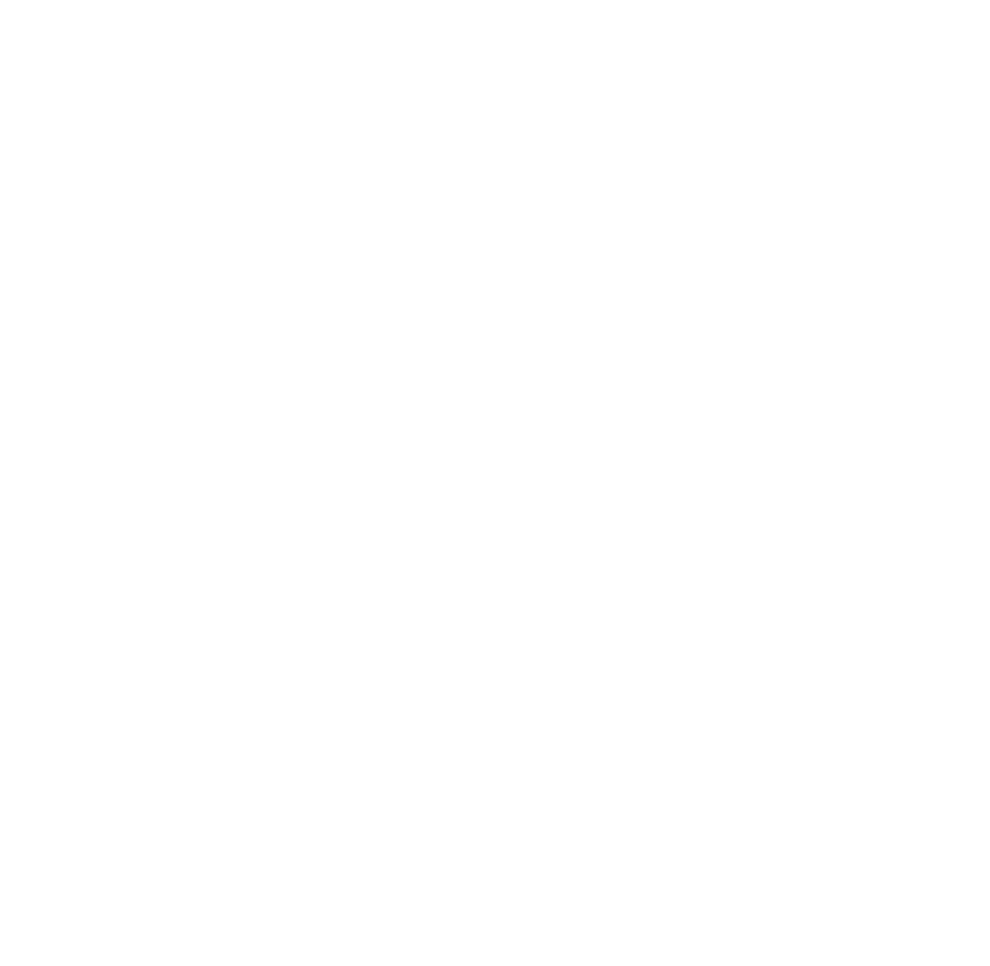

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(clf,
feature_names= features,
class_names= target,
filled= True)

fig.savefig('tree.png')


### 3.4 Parameter tuning

Voer nu voor beide modellen (KNN en Decision Tree) parameter tuning uit. Maak gebruik van de ingebouwde manier van _sklearn_ om _grid search_ toe te passen, gecombineerd met _cross validatie_. Gebruik hiervoor enkel je trainingsdata. Geef voor beide modellen: 
- De beste parameters
- De gemiddelde cross validatie score van het model met deze beste parameters
- De score van dit beste model op de volledige trainingsset
- De score van dit beste model op de ongeziene testset

Geef de scores weer als tekst en nadien ook als een bar chart. 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1,2,3,4,5],
                'random_state': [0,5,10,20,40]}
                

In [ ]:
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid,cv =5, return_train_score= True)

X_train, X_test, y_train, y_test= train_test_split(features, target, test_size= 0.3)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.31
Best parameters: {'max_depth': 1, 'random_state': 5}
Best cross-validation score: 0.20
Best estimator:
DecisionTreeRegressor(max_depth=1, random_state=5)


In [ ]:
param_grid = {'n_neighbors': range(1,12,2),
                'weights': ['uniform', 'distance']}

In [ ]:
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid,cv =5, return_train_score= True)

X_train, X_test, y_train, y_test= train_test_split(features, target, test_size= 0.3)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.11
Best parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.18
Best estimator:
KNeighborsRegressor(n_neighbors=9, weights='distance')


In [ ]:
display(grid_search)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 12, 2),
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

## deel 4 : evaluatie leermodellen (2ptn)

Beide modellen geven je 3 scores: 
* De gemiddelde cross validatie score van het model met deze beste parameters
* De score van dit beste model op de volledige trainingsset
* De score van dit beste model op de ongeziene testset

Vergelijk de scores per model en vergelijk de twee modellen onderling. Toon aan dat je begrijpt wat deze scores betekenen. Kan je de relatie tussen deze scores verklaren? 

Welk model werkt het best? Kan je dit verklaren? 

_Opmerking: dit deel staat op 2 van de 20 punten, geef dus voldoende uitleg. Probeer voldoende technische termen in je uitleg te verwerken._

> 🟢 Geef hier je uitleg